<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning Avanzado
*17 de Diciembre de 2024*

#### Integrantes: 
`Jocelyn Cáceres, Kurt Castro, Giuseppe Lavarello, Carlos Saquel`

1) LSTM producción de leche
    - Preparación de Datos
    - Visualización serie de tiempo
    - Análisis serie de tiempo? tendencia, estacionalidad, etc
    - Modelo LSTM
        - Separar datos (train, test, ¿val?)
        - Diseño arquitectura modelo
        - Entrenar modelo
        - Validacion y calculo de metricas
        - predicciones (pide 3 meses)
            - Visualizar predicciones
            - Comparar resultados

2) LSTM producción IPSA
    - Obtencion de datos (probablemente directo de la pagina de la bolsa de santiago)
    - Preparación de Datos
    - Visualización serie de tiempo
    - Análisis serie de tiempo?
    - Modelo LSTM
        - Separar datos (train, test, ¿val?)
        - Diseño arquitectura modelo
        - Entrenar modelo
        - Validacion y calculo de metricas
        - predicciones (pide 3 meses)
            - Visualizar predicciones
            - Comparar resultados
3) Autoencoder, limpieza de imágenes y extracción de texto
    - Preparación de Datos
    - Visualización de muestra de datos
    - Preprosesamiento de imagenes
    - Autoencoder
        - Separar imagenes (train, test, val)
        - Diseño arquitectura modelo
        - Entrenar modelo
        - Limpiar imagenes y visualizar comparacion de 2 o 3 ejemplos
        - Extraer texto y validar 
        - Usar imagen propia "mostrar imagen inicial y después de correr el modelo"

4) Conclusiones y dar formato de Informe
    - Ejemplo: 
        1. Objetivo
        2. Introducción
        3. Metodología 
            - Aca el codigo y las validaciones
        4. Conclusiones    


2) LSTM producción IPSA
    - Obtencion de datos (probablemente directo de la pagina de la bolsa de santiago)
    - Preparación de Datos
    - Visualización serie de tiempo
    - Análisis serie de tiempo?
    - Modelo LSTM
        - Separar datos (train, test, ¿val?)
        - Diseño arquitectura modelo
        - Entrenar modelo
        - Validacion y calculo de metricas
        - predicciones (pide 3 meses)
            - Visualizar predicciones
            - Comparar resultados

### Importe de paquetes

In [332]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Preparación y Carga de la Data

In [333]:
df_IPSA = pd.read_excel(r'./Cuadro_13122024183130.xlsx', header=2)

In [334]:
df_IPSA.head()

,Periodo,1.IPSA (índice enero 2003=1000)
0,2003-01-01,1001.99
1,2003-02-01,1014.94
2,2003-03-01,1009.13
3,2003-04-01,1163.96
4,2003-05-01,1231.01


In [335]:
df_IPSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Periodo                                                 263 non-null    datetime64[ns]
 1   1.IPSA  (índice enero 2003=1000)                        263 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


**Importante** No hay valores nulos que necesiten evaluación.

### Visualización de la data

<Axes: xlabel='Periodo'>

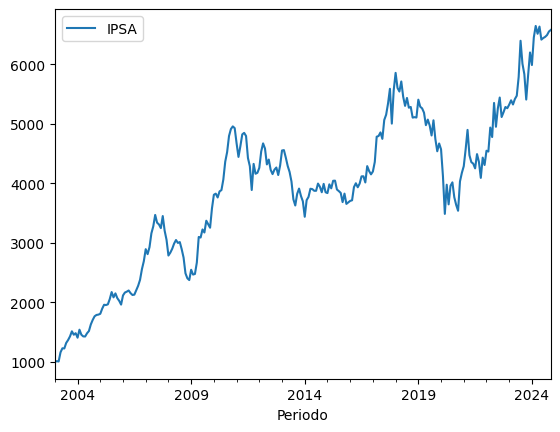

In [336]:
# Seteo de fecha como indice
df_IPSA.set_index('Periodo', inplace=True)

# renombre de columna
df_IPSA.rename(columns={'1.IPSA  (índice enero 2003=1000)                      ':'IPSA'}, inplace=True)

# Escalamiento para modelo
scaler = MinMaxScaler(feature_range=(0, 1))
df_IPSA['Escalado'] = scaler.fit_transform(df_IPSA[['IPSA']])
df_IPSA.plot(y='IPSA')


### Análisis de la serie de tiempo

La data presenta una clara tendencia alcista, pero también muestra una volatilidad significativa, que podría estar relacionada con eventos mundiales como la crisis de 2008, el estallido social y la pandemia de COVID-19, considerando los períodos en los que se observan cambios abruptos.  
Si bien no hay una estacionalidad inmediatamente evidente, podrían existir patrones anuales al analizar el espectro diferencial.


### Elección de parametros y diseño del modelo 

In [337]:
retrasos = 3 #Numero de columnas de retrazo a crear

for i in range(1, retrasos + 1):
    df_IPSA[f'lag_{i}'] = df_IPSA['Escalado'].shift(i)
    
df_IPSA['Objetivo'] = df_IPSA['Escalado']
df_IPSA.dropna(inplace=True)  # Drop Nans


In [338]:
X = df_IPSA[[col for col in df_IPSA.columns if col.startswith('lag')]].values
y = df_IPSA['Objetivo'].values

Se le da el formato requerido por el modelo LSTM a los datos.  


In [339]:
X = X.reshape((X.shape[0], X.shape[1], 1))


Se separan los datos en entrenamiento y testeo

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #Shuffle false es importante para mantener el orden de la serie de tiempo


Diseñamos la arquitectura del modelo; en este caso, es un modelo LSTM simple.  


In [341]:


# Crear el LSTM modelo
model = Sequential()
model.add(Input((X_train.shape[1], 1)))
model.add(LSTM(units=500, activation='relu', return_sequences=False))
model.add(Dense(units=1))

# Compilar el Modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumen de modelo
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 500)            │     1,004,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,004,501 (3.83 MB)

 Trainable params: 1,004,501 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

In [342]:

history = model.fit(X_train, y_train, epochs=100, batch_size=256, verbose=0)


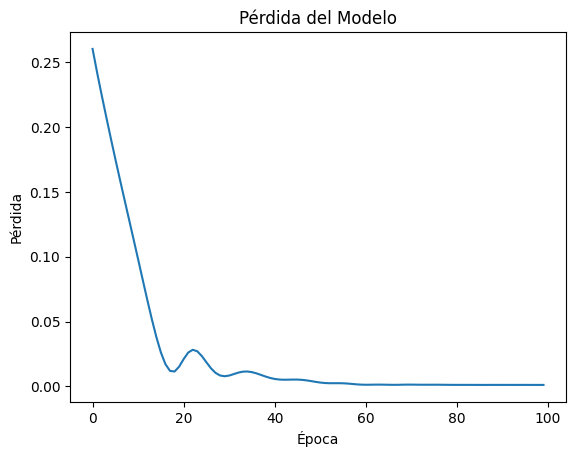

In [343]:
# Graficar la pérdida de entrenamiento y validación
plt.plot(history.history['loss'])


# Añadir etiquetas y título
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

### Validación y cálculo de métricas.  


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step


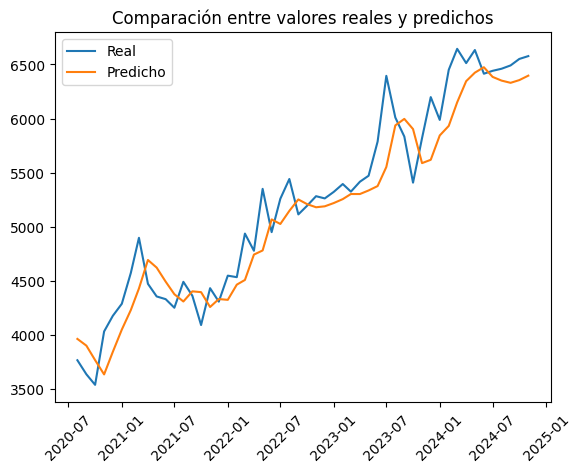

In [344]:

predicciones = model.predict(X_test)


predicciones_reescalado = scaler.inverse_transform(predicciones)
y_test_rescalado = scaler.inverse_transform(y_test.reshape(-1, 1))

dates = list(df_IPSA[int(len(df_IPSA)*0.8):].index)

plt.xticks(rotation=45)
plt.title('Comparación entre valores reales y predichos')
plt.plot(dates,y_test_rescalado, label='Real')
plt.plot(dates,predicciones_reescalado, label='Predicho')
plt.legend()
plt.show()


In [345]:
mae_IPSA = mean_absolute_error(y_test_rescalado,predicciones_reescalado)
mse_IPSA = mean_squared_error(y_test_rescalado,predicciones_reescalado)
r2_IPSA = r2_score(y_test_rescalado,predicciones_reescalado)

n = len(y_test)
p = X_train.shape[1] # numero de features (en este caso lags)

adjusted_r2_IPSA = 1 - ((1 - r2_IPSA) * (n - 1)) / (n - p - 1)

print(f"Mean Absolute Error (MAE): {mae_IPSA:.1f}")
print(f"Mean Squared Error (MSE): {mse_IPSA:.1f}")
print(f"Root Mean Squared Error (RMSE): {mse_IPSA**0.5:.1f}")
print(f"R² ajustado: {adjusted_r2_IPSA:.3f}")

Mean Absolute Error (MAE): 228.2
Mean Squared Error (MSE): 81175.1
Root Mean Squared Error (RMSE): 284.9
R² ajustado: 0.892


In [352]:
#Obtener el valor del ultimo dato y darle formato que espera el modelo
last_data = df_IPSA[[col for col in df_IPSA.columns if col.startswith('lag')]].iloc[-1:].values.reshape(1, X.shape[1], 1) 

In [351]:
#prediccion de los siguientes n meses
n_meses = 3
prediccion_n_meses = []
for i in range(n_meses):
    predicciones2 = model.predict(last_data)
    last_data = np.roll(last_data, -1)
    last_data[0][-1] = predicciones2
    prediccion_n_meses.append(predicciones2[0])

print("Los valores de los proximos 3 meses seran:", scaler.inverse_transform(prediccion_n_meses).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Los valores de los proximos 3 meses seran: [6116.17302405 6073.65869654 6031.78194775]


In [348]:
dates_extended = pd.date_range(dates[-1] + pd.DateOffset(months=1), periods=3, freq='MS')
dates_extended = [pd.Timestamp(date) for date in dates_extended]
dates_extendend=dates+dates_extended

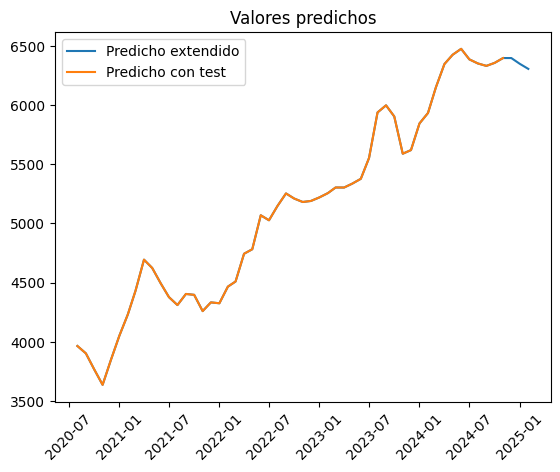

In [349]:

plt.plot(dates_extendend,scaler.inverse_transform(np.concat((predicciones,last_data[0]))), label='Predicho extendido', )
plt.plot(dates,scaler.inverse_transform((predicciones)), label='Predicho con test')

plt.legend()
plt.title("Valores predichos")
plt.xticks(rotation=45)
plt.show()